In [15]:
from sklearn.ensemble import (
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    HistGradientBoostingClassifier,
)
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier, XGBRFClassifier
from mlcomp.data.load import load_classification_train, load_classification_test
from mlcomp.data.preprocess import remove_outliers, drop_ft2, HandlingMethod
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib



In [16]:

algos = [
    #AdaBoostClassifier,
    #BaggingClassifier,
    ExtraTreesClassifier,
    #GradientBoostingClassifier,
    #RandomForestClassifier,
    HistGradientBoostingClassifier,
    XGBClassifier,
    #XGBRFClassifier,
]



#X, y = load_classification_train(X_y_split=True)

df = load_classification_train()
df = drop_ft2(df)
df = remove_outliers(df, handling_method=HandlingMethod.CAP_AT_MIN_MAX, random_state=42)

X = df.drop(columns='label')

to_drop = {
    'ExtraTreesClassifier': ['feature_13', 'feature_14', 'feature_20', 'feature_21', 'feature_27'],
    'HistGradientBoostingClassifier': ['feature_3', 'feature_4', 'feature_22'],
    'XGBClassifier': ['feature_4', 'feature_16']
}

X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

y = df['label']

c:\Users\baumg\miniconda3\lib\site-packages\mlcomp\data\preprocess.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result[c].loc[mask == -1] = clipped


In [17]:
results = pd.DataFrame(columns=["model_name", "cv_result", "model"])

for index, alg in enumerate(algos):
    model = alg()
    model_name = model.__class__.__name__

    print(f"Fitting {model_name}...")

    X_dropped = X.drop(columns=to_drop[model_name])

    cv_res = cross_validate(model, X_dropped, y, cv=10, scoring="f1_macro")

    results.loc[index] = [model_name, cv_res, model]

Fitting ExtraTreesClassifier...
Fitting HistGradientBoostingClassifier...
Fitting XGBClassifier...


In [18]:
results['cv_mean'] = results['cv_result'].map(lambda x: x['test_score'].mean())

res_sort = results.sort_values('cv_mean', ascending=False)
results


,model_name,cv_result,model,cv_mean
0,ExtraTreesClassifier,"{'fit_time': [0.25825953483581543, 0.211428403...",ExtraTreesClassifier(),0.784580
1,HistGradientBoostingClassifier,"{'fit_time': [0.8815658092498779, 0.7138648033...",HistGradientBoostingClassifier(),0.802356
2,XGBClassifier,"{'fit_time': [0.08782744407653809, 0.090018987...","XGBClassifier(base_score=None, booster=None, c...",0.777812


Reihenfolge: ExtraTreesClassifier, HistGradientBoostingClassifier, XGBClassifier

#### Nix:
0.784693
0.791845
0.795470

#### ft2 entfernt:
0.786814
0.791845
0.795470

#### + iso f outlier removal:
0.763181
0.792710
0.782105

#### + scale:
0.770054
0.792710
0.781328

#### + anhand to_drop features entfernt:
0.761900
0.788001
0.760194

#### ft2, iso f outlier cap at min max, scale:
0.777968
0.788468
0.789704

#### + anhand to_drop ft entfernt:
0.784580
0.802356
0.777812

In [19]:

#joblib.dump(results, 'sel_res_rm2_iso_f_rm_outlier_stdscale_perm_imp.joblib')
#joblib.dump(to_drop, 'to_drop_for_the_res.joblib')

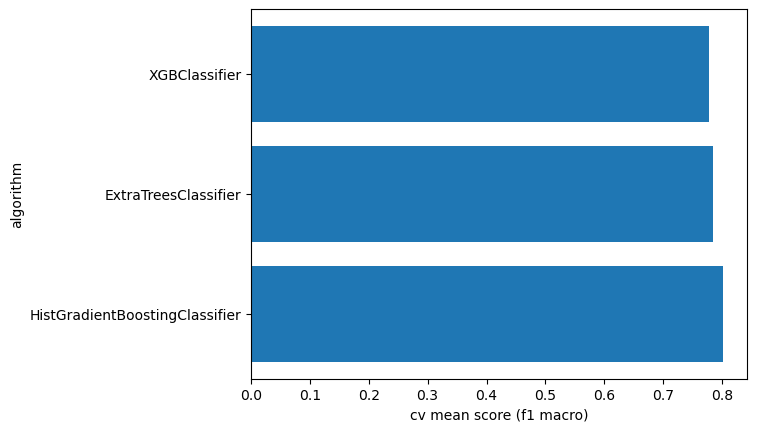

In [20]:
plt.barh(res_sort['model_name'], res_sort['cv_mean'])
plt.xlabel('cv mean score (f1 macro)')
plt.ylabel('algorithm')
plt.show()


In [21]:
results

,model_name,cv_result,model,cv_mean
0,ExtraTreesClassifier,"{'fit_time': [0.25825953483581543, 0.211428403...",ExtraTreesClassifier(),0.784580
1,HistGradientBoostingClassifier,"{'fit_time': [0.8815658092498779, 0.7138648033...",HistGradientBoostingClassifier(),0.802356
2,XGBClassifier,"{'fit_time': [0.08782744407653809, 0.090018987...","XGBClassifier(base_score=None, booster=None, c...",0.777812
